### **Importance of Predicting VO2 Max**
1.	Assess Aerobic Fitness:
VO2 Max is a critical metric for assessing an athlete's aerobic
capacity and overall cardiovascular fitness. It indicates how well the body can utilize oxygen during exercise, which is essential for endurance sports.
2.	Performance Optimization:
By predicting VO2 Max, athletes and coaches can better understand the athlete's fitness level and identify areas for improvement. This can lead to more targeted and effective training programs.
3.	Training and Recovery:
Understanding VO2 Max helps in designing training regimens that optimize aerobic capacity and improve recovery times. Athletes can track their progress and adjust their training intensity accordingly.
4.	Health Monitoring:
Regular monitoring of VO2 Max can provide insights into an athlete's overall health. Significant changes in VO2 Max can indicate improvements or declines in fitness, prompting adjustments in training or further medical evaluation if needed.
5.	Personalized Training Programs:
With accurate predictions of VO2 Max, training programs can be personalized to fit the specific needs and goals of the athlete. This can enhance performance and reduce the risk of overtraining or injury.


### **Why Use FTP/Power Curve Data?**
1.	Reliable Indicators:
FTP (Functional Threshold Power) and Power Curve data are reliable indicators of an athlete's performance capabilities. These metrics reflect the athlete's ability to sustain power output over time, which correlates well with aerobic capacity.
2.	Readily Available:
FTP and Power Curve data are often readily available from training devices and software used by athletes, making it convenient to use for predictive modeling.
3.	Comprehensive Analysis:
Using FTP/Power Curve data allows for a comprehensive analysis of performance, considering various aspects of fitness and endurance. This leads to more accurate and meaningful predictions.

By predicting VO2 Max using FTP/Power Curve data, we can gain valuable insights into an athlete's fitness and performance, tailor training programs effectively, and monitor health and progress over time. This ultimately helps in achieving better athletic outcomes and maintaining optimal health.


**Load the data.**

In [ ]:
import pandas as pd
# Load the dataset )
data = pd.read_csv('/content/Simu_VO2_activities.csv')
# Check the first few rows of the dataset to see the column names and data
print(data.head())

   Activity ID          Activity Date      Activity Name Activity Type  \
0   2929442069  23 Mar 2023, 03:23:30  Cricket Session 1       Cricket   
1   2929442070  03 Aug 2022, 03:23:30  Cricket Session 2       Cricket   
2   2929442071  29 Oct 2022, 03:23:30  Cricket Session 3       Cricket   
3   2929442072  19 Oct 2023, 03:23:30  Cricket Session 4       Cricket   
4   2929442073  02 Nov 2023, 03:23:30  Cricket Session 5       Cricket   

   Elapsed Time  Distance  Max Heart Rate  Relative Effort  Commute  \
0          6482  6.124643           140.0             18.0    False   
1          4679  3.877109           165.0             19.0    False   
2          4528  9.762030           174.0             10.0     True   
3          7061  7.304651           148.0             19.0    False   
4          6441  3.112718           168.0             15.0    False   

                       Filename  ...  Maximum Power 1.0min  \
0  activities/3028135094.csv.gz  ...            173.795947   
1  a

To predict VO2 Max based on available power data and metrics, We don't have FTP (Functional Threshold Power) directly in our dataset. However, We can estimate FTP using some of the power data we have. Typically, FTP is assumed to be the highest power that an athlete can sustain for an extended period of time, often around 20 minutes.

We have several columns related to Maximum Power over various time intervals, such as:

*  Maximum Power 5s

*  Maximum Power 10s

*  Maximum Power 30s

*  Maximum Power 1.0min

*  Maximum Power 5.0min

*  Maximum Power 10.0min

*  Maximum Power 20.0min

*  Maximum Power 30.0min

*  Maximum Power 1.0 hr

*  Maximum Power 1.5 hr

*  Maximum Power 2.0 h

From these, the FTP value is commonly estimated from the power sustained over a 20-minute effort, so we could use the value from Maximum Power 20.0min as a proxy for FTP.

**Steps to Estimate FTP:**

Use Maximum Power Over 20-Minutes:

If you have Maximum Power 20.0min, it is a good starting point for estimating FTP. Typically, FTP is considered to be about 90-95% of the Maximum Power sustained for 20 minutes.
Formula:

**FTP
≈
Maximum Power 20.0min
×
0.9**


**Example:**

For Maximum Power 1.0min, you might estimate FTP as roughly 80-85% of the 1-minute power.
For Maximum Power 5.0min, you might estimate FTP as roughly 85-90% of the 5-minute power.

**Calculate FTP Values.**

In [ ]:
# Estimate FTP based on Maximum Power 20.0min (typically around 90-95% of that value)
data['Estimated_FTP'] = data['Maximum Power 20.0min'] * 0.9  # Or use 0.95 for a more conservative estimate

# Check the updated dataset with estimated FTP values
print(data[['Activity ID', 'Maximum Power 20.0min', 'Estimated_FTP']].head())

   Activity ID  Maximum Power 20.0min  Estimated_FTP
0   2929442069             235.957181     212.361463
1   2929442070             227.946295     205.151665
2   2929442071             220.806121     198.725509
3   2929442072             217.233009     195.509708
4   2929442073             191.343804     172.209424


**Save the File.**

In [ ]:
# Save the updated dataset to a new CSV file in the specified directory
output_file_path = r'D:\study\SIT782\simu_vo2_activities_with_ftp.csv'
data.to_csv(output_file_path, index=False)

print(f"\nUpdated data with FTP values has been saved to: {output_file_path}")


Updated data with FTP values has been saved to: D:\study\SIT782\simu_vo2_activities_with_ftp.csv


**Check the missing values,Null values.**

In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)
# Count duplicate rows
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)
# Display data types of each column
print("Data types:\n", data.dtypes)
# Generate summary statistics
print("Summary statistics:\n", data.describe())

Missing values per column:
 Activity ID              0
Activity Date            0
Activity Name            0
Activity Type            0
Elapsed Time             0
Distance                 0
Max Heart Rate           0
Relative Effort          0
Commute                  0
Filename                 0
Athlete Weight           0
Moving Time              0
Max Speed                0
Average Speed            0
Elevation Gain           0
Elevation Loss           0
Elevation Low            0
Elevation High           0
Max Cadence              0
Average Cadence          0
Average Heart Rate       0
Average Watts            0
Calories                 0
Average Temperature      0
Total Work               0
Maximum Power 5s         0
Maximum Power 10s        0
Maximum Power 30s        0
Maximum Power 1.0min     0
Maximum Power 5.0min     0
Maximum Power 10.0min    0
Maximum Power 20.0min    0
Maximum Power 30.0min    0
Maximum Power 1.0 hr     0
Maximum Power 1.5 hr     0
Maximum Power 2.0 hr     0


**Check how many different activity types are in the dataset**

In [ ]:
import pandas as pd

# Load the dataset with FTP values
df = pd.read_csv('/content/simu_vo2_activities_with_ftp.csv')

# Check how many different activity types are in the dataset
activity_types = df['Activity Type'].unique()

# Print the different activity types
print("Different activity types:", activity_types)

# Count the number of each activity type
activity_type_counts = df['Activity Type'].value_counts()

# Print the count of each activity type
print("\nActivity type counts:\n", activity_type_counts)

Different activity types: ['Cricket' 'Football' 'Ride' 'Run']

Activity type counts:
 Activity Type
Ride        181
Run         164
Cricket      50
Football     50
Name: count, dtype: int64


**Plotting VO2 Max vs. Estimated FTP for Different Activity Types**

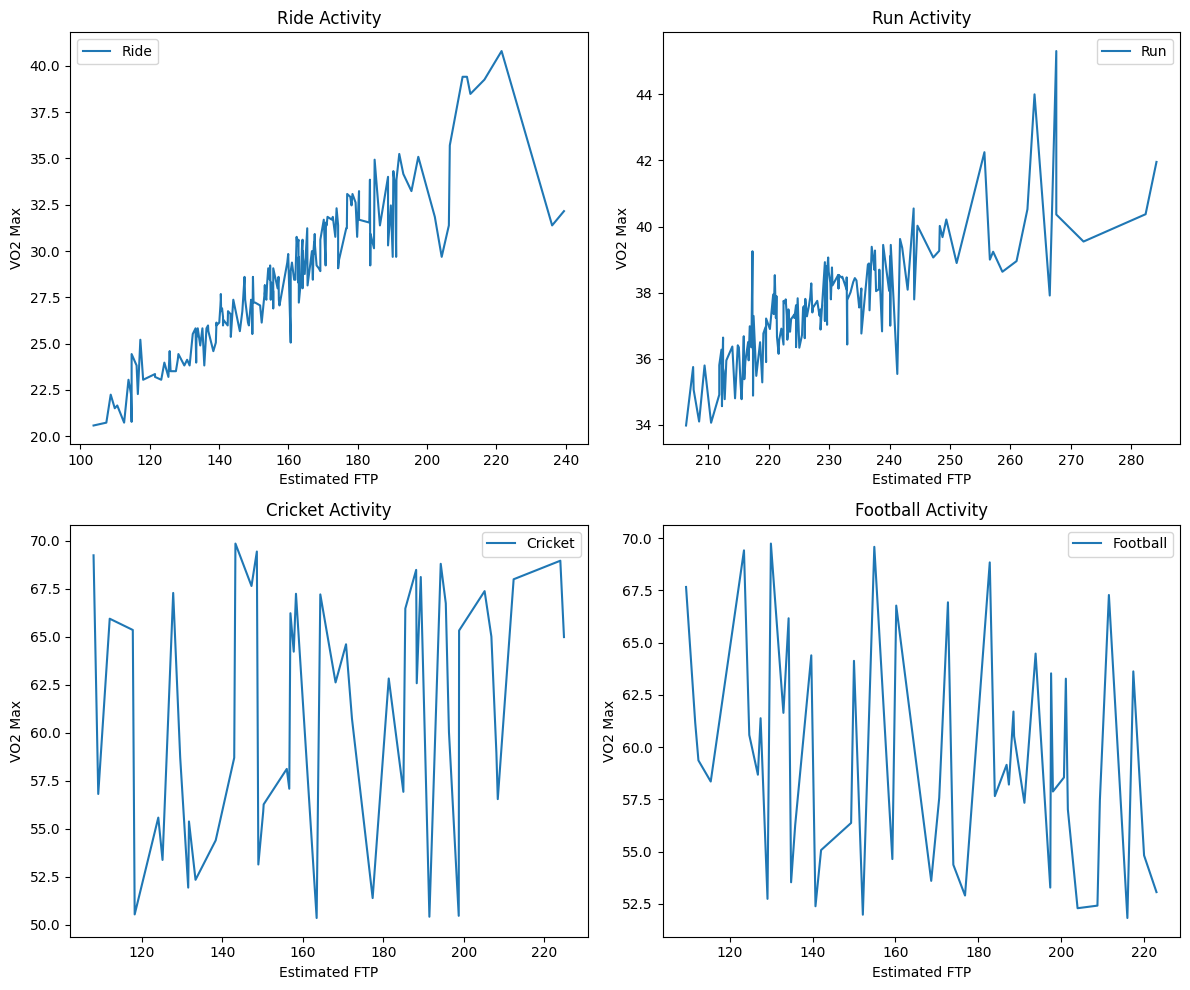

In [ ]:
import matplotlib.pyplot as plt

# Define activity types
activity_types = [ 'Ride', 'Run', 'Cricket','Football']

# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

# Loop through each activity type and plot
for i, activity in enumerate(activity_types):
    # Filter data by activity type
    activity_data = data[data['Activity Type'] == activity]

    # Sort by FTP for a smooth line plot
    activity_data = activity_data.sort_values(by='Estimated_FTP')

    # Plot a line graph without markers
    axs[i].plot(activity_data['Estimated_FTP'], activity_data['VO2 Max'], label=activity)
    axs[i].set_title(f'{activity.capitalize()} Activity')
    axs[i].set_xlabel('Estimated FTP')
    axs[i].set_ylabel('VO2 Max')
    axs[i].legend()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

•	Running and Cycling: Show strong positive correlations between FTP and VO2 Max, suggesting that improving FTP can enhance aerobic capacity.

•	Cricket and Football: Display more variability with less clear trends, reflecting the mixed nature of these sports which involve both aerobic and anaerobic activities.


To decide whether linear regression is suitable for our task (predicting VO2 max from FTP), we should check if the relationship between FTP and VO2 max is linear. Here's how we can suspect or assess if linear regression is appropriate:

**1. Visualize the Relationship**

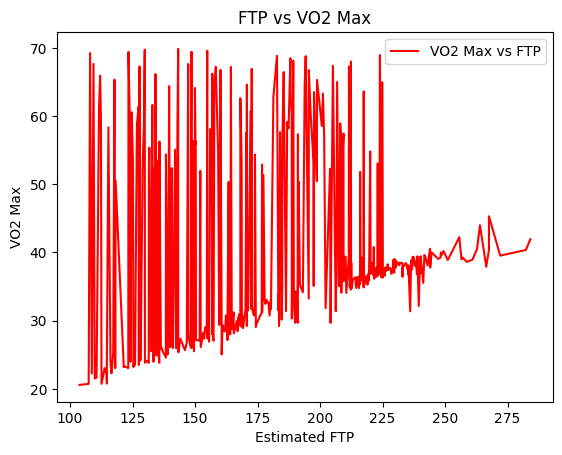

In [ ]:
import matplotlib.pyplot as plt

# Sort the data by FTP to ensure the line connects the points in order
data_sorted = data.sort_values(by='Estimated_FTP')

# Plotting FTP vs VO2 Max as a line plot without points
plt.plot(data_sorted['Estimated_FTP'], data_sorted['VO2 Max'], color='red', linestyle='-', label='VO2 Max vs FTP')

# Adding labels and title
plt.xlabel('Estimated FTP')
plt.ylabel('VO2 Max')
plt.title('FTP vs VO2 Max')

# Display the legend
plt.legend()

# Show the plot
plt.show()

**2. Check the Correlation**

**Pearson Correlation:** Calculate the correlation coefficient between FTP and VO2 max. Linear regression works best when there’s a strong linear correlation (either positive or negative).

A correlation value close to +1 or -1 suggests a strong linear relationship, while a value close to 0 indicates a weak or no linear relationship.

In [ ]:
# Calculate Pearson correlation coefficient
correlation = df['Estimated_FTP'].corr(df['VO2 Max'])
print(f"Pearson Correlation: {correlation}")

Pearson Correlation: 0.0807807016183298


**3. Fit a Linear Regression Model**

Even if the relationship looks somewhat linear, you can fit a linear regression model to see how well it explains the relationship between FTP and VO2 max.

Check the R-squared value (coefficient of determination) after fitting the model. R-squared indicates how well the regression line fits the data:

**R² close to 1:** The model explains most of the variance, indicating a good fit for linear regression.

**R² close to 0**: The model does not explain much of the variance, suggesting the relationship is not linear.

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['Estimated_FTP']].values
y = df['VO2 Max'].values

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get R-squared value
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")


R-squared: 0.0065255217539496035


**4. Check Residuals (Errors)**

Residuals Analysis: After fitting a linear regression model, check the residuals (the differences between actual values and predicted values).
If the residuals show a random scatter around 0 (with no clear pattern), it means the linear model has captured the data well.

If the residuals show a non-random pattern (e.g., a curve), this suggests that the relationship is not linear, and you should try a non-linear model.

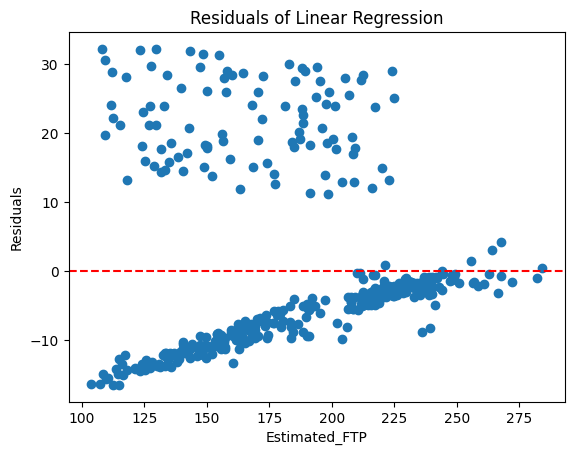

In [ ]:
# Predict values using the linear regression model
y_pred = model.predict(X)

# Calculate residuals
residuals = y - y_pred

# Plot residuals
plt.scatter(X, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Estimated_FTP')
plt.ylabel('Residuals')
plt.title('Residuals of Linear Regression')
plt.show()

**Pearson Correlation (0.0808):** This value represents a very weak positive correlation between the two variables. A Pearson correlation closer to 0 indicates that the variables do not have a strong linear relationship. In this case, the low value suggests that changes in one variable are only weakly associated with changes in the other.

**R-squared (0.0065):** This indicates that only 0.65% of the variance in the dependent variable can be explained by the independent variable(s) in our model. An R-squared value close to 0 means that the model has poor explanatory power and that the model's predictors don't effectively explain the variation in the target variable.

Both of these values suggest that the model or relationship between the variables may need improvement, possibly by incorporating more relevant predictors or revising the model.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

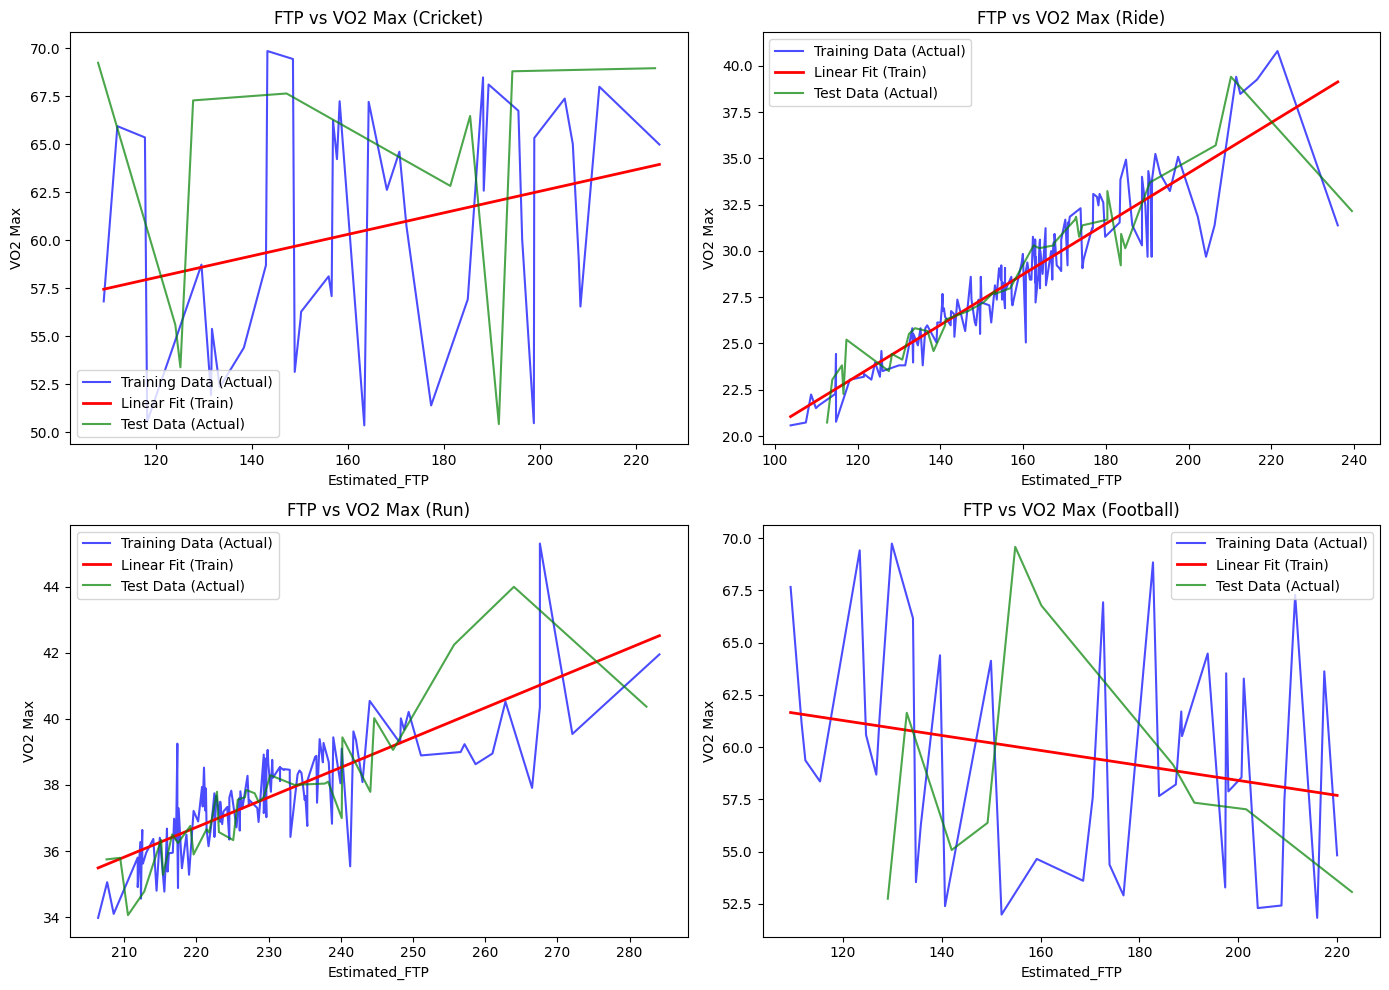


Performance Metrics:
Cricket: R² = -0.17, RMSE = 7.38
Ride: R² = 0.82, RMSE = 1.69
Run: R² = 0.73, RMSE = 1.03
Football: R² = 0.02, RMSE = 5.25


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Define activity types
activity_types = ['Cricket', 'Ride', 'Run', 'Football']

# Set up subplots for each activity
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Dictionary to store performance metrics
metrics = {}

# Loop through each activity type and create line plots
for i, activity in enumerate(activity_types):
    # Filter data by activity type
    activity_data = df[df['Activity Type'] == activity]

    # Check if there is any data for the activity
    if activity_data.empty:
        axs[i].text(0.5, 0.5, f"No data for {activity}", ha='center', va='center', fontsize=12, color='red')
        axs[i].set_title(f'FTP vs VO2 Max ({activity.capitalize()})')
        axs[i].set_xlabel('Estimated_FTP')
        axs[i].set_ylabel('VO2 Max')
        continue  # Skip to the next activity type if there's no data

    # Extract FTP and VO2 Max
    X = activity_data[['Estimated_FTP']].values
    y = activity_data['VO2 Max'].values

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict VO2 Max on both training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate performance metrics on test data
    r2 = r2_score(y_test, y_test_pred)
    rmse = mean_squared_error(y_test, y_test_pred, squared=False)

    # Store metrics in the dictionary
    metrics[activity] = {'R²': r2, 'RMSE': rmse}

    # Sort data for smooth line plots
    sorted_idx_train = np.argsort(X_train.flatten())
    X_train_sorted = X_train[sorted_idx_train]
    y_train_sorted = y_train[sorted_idx_train]
    y_train_pred_sorted = y_train_pred[sorted_idx_train]

    sorted_idx_test = np.argsort(X_test.flatten())
    X_test_sorted = X_test[sorted_idx_test]
    y_test_sorted = y_test[sorted_idx_test]
    y_test_pred_sorted = y_test_pred[sorted_idx_test]

    # Plot lines for the activity
    axs[i].plot(X_train_sorted, y_train_sorted, 'b-', label='Training Data (Actual)', alpha=0.7)
    axs[i].plot(X_train_sorted, y_train_pred_sorted, 'r-', label='Linear Fit (Train)', linewidth=2)
    axs[i].plot(X_test_sorted, y_test_sorted, 'g-', label='Test Data (Actual)', alpha=0.7)
    axs[i].set_title(f'FTP vs VO2 Max ({activity.capitalize()})')
    axs[i].set_xlabel('Estimated_FTP')
    axs[i].set_ylabel('VO2 Max')
    axs[i].legend()

plt.tight_layout()
plt.show()

# Print performance metrics for each activity
print("\nPerformance Metrics:")
for activity, values in metrics.items():
    print(f"{activity}: R² = {values['R²']:.2f}, RMSE = {values['RMSE']:.2f}")


**Cricket and Football:**

Linear regression is not capturing the relationship between FTP and VO2 Max effectively.

These activity types might have non-linear relationships between the features.

Investigate whether these activities require additional features (e.g., heart rate, calories) to improve performance.

**Ride and Run:**

Linear regression performs well here, with strong R² and low RMSE values.

### **Polynomial Regression:**

Linear regression assumes a straight-line relationship between the independent variable (FTP) and the dependent variable (VO2 Max). If the actual relationship is curvilinear (e.g., VO2 Max increases at a decreasing rate with FTP), linear regression won't capture the complexity.

Polynomial regression extends linear regression by introducing higher-degree terms of the independent variable, allowing the model to fit curves, not just straight lines. For example, using FTP^2 (quadratic term) or higher powers can capture bending trends in the data.

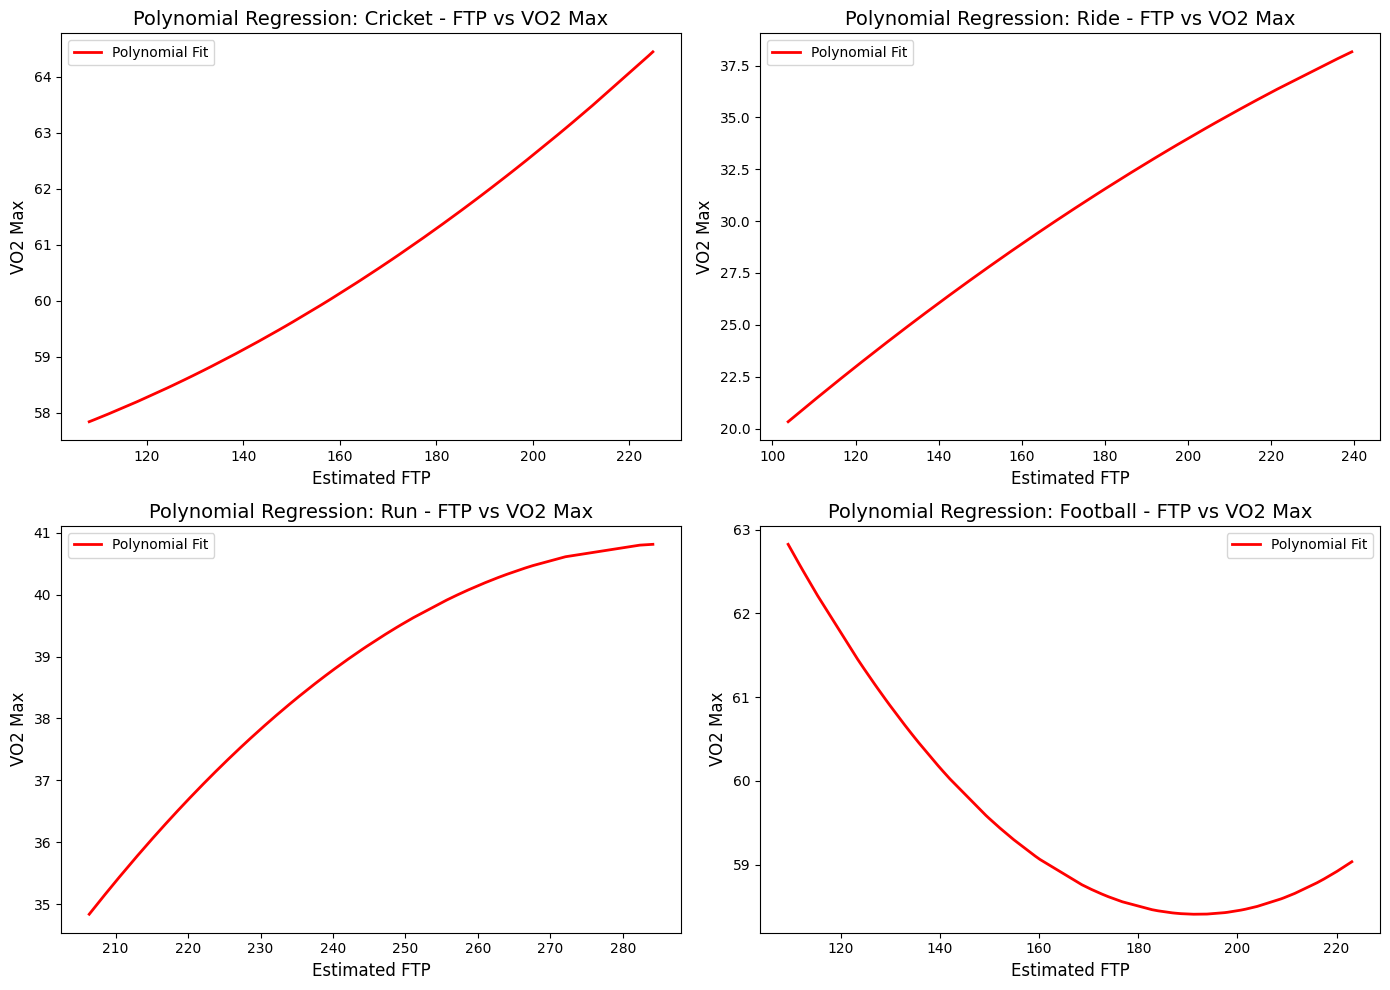

Performance Metrics:

Cricket - R²: -0.14, RMSE: 7.29
Ride - R²: 0.85, RMSE: 1.57
Run - R²: 0.74, RMSE: 1.01
Football - R²: -0.09, RMSE: 5.55


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Define activity types
activity_types = ['Cricket', 'Ride', 'Run', 'Football']

# Set up subplots for each activity
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Store performance metrics to print later
performance_metrics = {}

# Loop through each activity type and apply polynomial regression
for i, activity in enumerate(activity_types):
    # Filter data by activity type
    activity_data = df[df['Activity Type'] == activity]

    # Check if there is any data for the activity
    if activity_data.empty:
        axs[i].text(0.5, 0.5, f"No data for {activity}", ha='center', va='center', fontsize=12, color='red')
        axs[i].set_title(f'FTP vs VO2 Max ({activity.capitalize()})')
        axs[i].set_xlabel('Estimated_FTP')
        axs[i].set_ylabel('VO2 Max')
        continue  # Skip to the next activity type if there's no data

    # Extract FTP and VO2 Max
    X = activity_data[['Estimated_FTP']].values
    y = activity_data['VO2 Max'].values

    # Polynomial Feature Transformation (degree 2 for quadratic, change degree for more complexity)
    poly = PolynomialFeatures(degree=2)  # You can change the degree (e.g., degree=3 for cubic)
    X_poly = poly.fit_transform(X)

    # Split data into train and test sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

    # Fit Polynomial Regression model on training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test data
    y_test_pred = model.predict(X_test)

    # Performance Metrics for the test set
    r2_test = r2_score(y_test, y_test_pred)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    # Sorting the data by FTP to make the plot smooth
    X_sorted = np.sort(X.flatten()).reshape(-1, 1)
    X_poly_sorted = poly.transform(X_sorted)
    y_pred_sorted = model.predict(X_poly_sorted)

    # Plotting the polynomial regression fit for each activity
    axs[i].plot(X_sorted, y_pred_sorted, color='red', label='Polynomial Fit', linewidth=2)  # Polynomial curve
    axs[i].set_title(f'Polynomial Regression: {activity.capitalize()} - FTP vs VO2 Max', fontsize=14)
    axs[i].set_xlabel('Estimated FTP', fontsize=12)
    axs[i].set_ylabel('VO2 Max', fontsize=12)
    axs[i].legend()

    # Store performance metrics for later printing
    performance_metrics[activity] = {'R²': r2_test, 'RMSE': rmse_test}

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Now print the performance metrics
print("Performance Metrics:\n")
for activity, metrics in performance_metrics.items():
    print(f"{activity.capitalize()} - R²: {metrics['R²']:.2f}, RMSE: {metrics['RMSE']:.2f}")

The Polynomial Regression model is highly effective for Ride and Run activities, where there is a strong, consistent relationship between FTP and VO2 Max, leading to good model performance. For Football and Cricket, the model struggles due to weak or non-linear relationships, resulting in poor performance metrics. The model for Cricket in particular may need additional features or a different approach to improve predictions, while Football also shows limited predictive power based solely on FTP.

### **Support Vector Regression (SVR):**
Support Vector Regression (SVR) is a powerful non-linear regression technique that can be useful for predicting VO2 Max from FTP values, especially when the relationship between the two variables is complex and not adequately captured by linear or polynomial models.

It is more robust to outliers compared to polynomial regression. In datasets where there are extreme values of FTP or VO2 Max, SVR can maintain its performance without being skewed by these outliers. This is especially useful when data has noisy or extreme values.

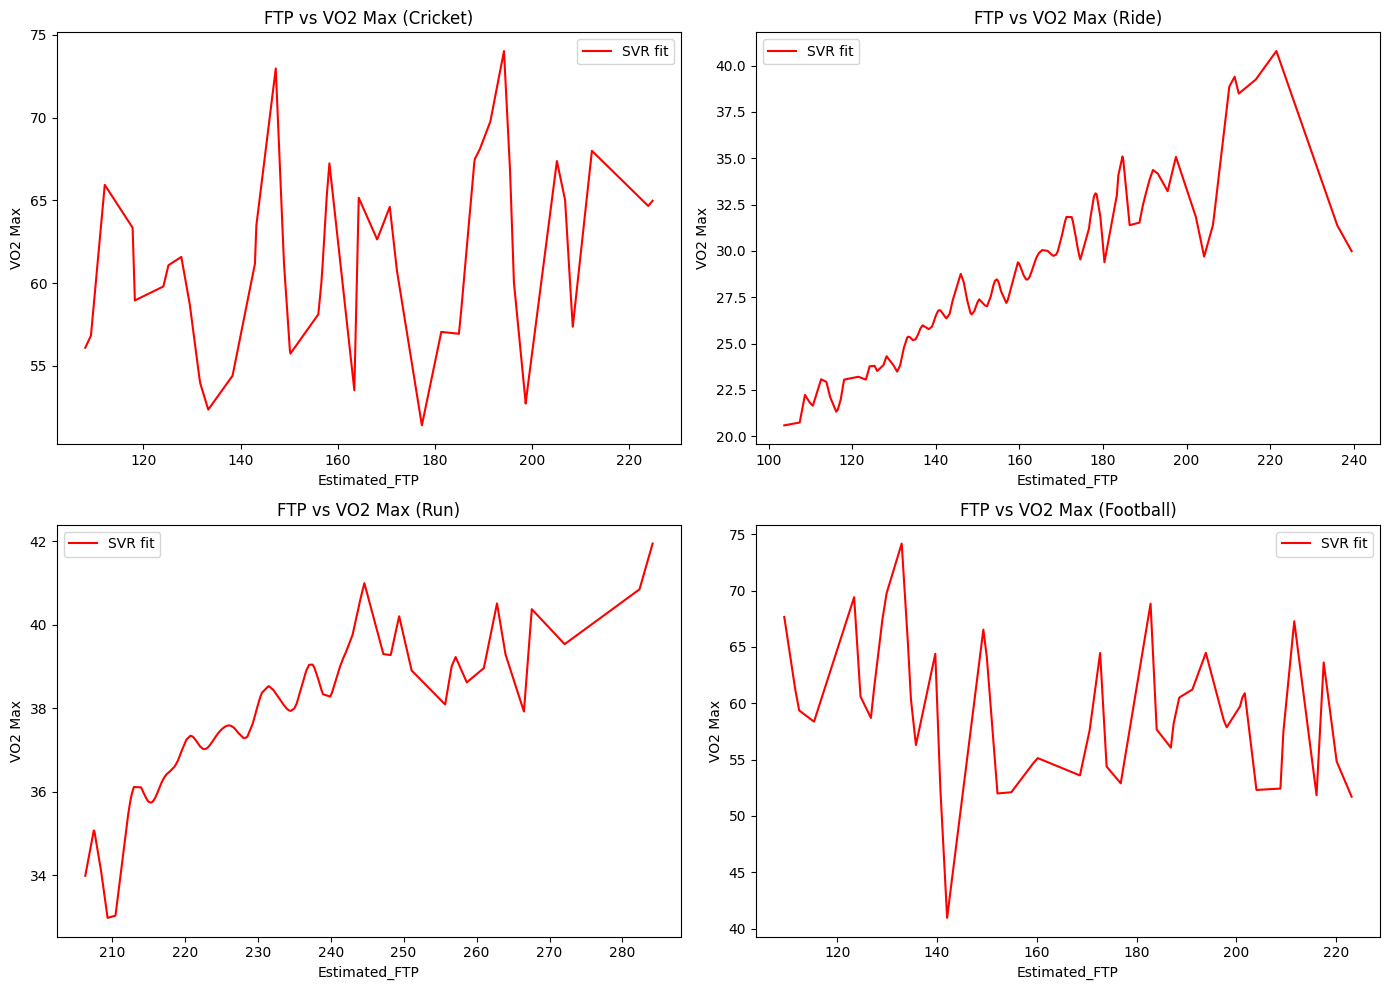

Performance Metrics for each activity:
Cricket: R² = -0.779, RMSE = 9.109
Ride: R² = 0.778, RMSE = 1.893
Run: R² = 0.464, RMSE = 1.445
Football: R² = -3.101, RMSE = 10.770


In [ ]:
from sklearn.svm import SVR

# Define activity types
activity_types = ['Cricket', 'Ride', 'Run', 'Football']

# Set up subplots for each activity
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Create a dictionary to store performance metrics
performance_metrics = {}

# Loop through each activity type and apply SVR
for i, activity in enumerate(activity_types):
    # Filter data by activity type
    activity_data = df[df['Activity Type'] == activity]

    # Check if there is any data for the activity
    if activity_data.empty:
        axs[i].text(0.5, 0.5, f"No data for {activity}", ha='center', va='center', fontsize=12, color='red')
        axs[i].set_title(f'FTP vs VO2 Max ({activity.capitalize()})')
        axs[i].set_xlabel('Estimated_FTP')
        axs[i].set_ylabel('VO2 Max')
        continue  # Skip to the next activity type if there's no data

    # Extract FTP and VO2 Max
    X = activity_data[['Estimated_FTP']].values
    y = activity_data['VO2 Max'].values

    # Split data into training and testing sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize SVR model with RBF kernel
    svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)

    # Train the SVR model
    svr.fit(X_train, y_train)

    # Predict VO2 Max values for test set
    y_pred = svr.predict(X_test)

    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store performance metrics in the dictionary
    performance_metrics[activity] = {'R²': r2, 'RMSE': rmse}

    # Plot the SVR regression line
    X_sorted = np.sort(X.flatten())  # Sort FTP values for smoother plot
    y_sorted_pred = svr.predict(X_sorted.reshape(-1, 1))

    axs[i].plot(X_sorted, y_sorted_pred, color='red', label='SVR fit')
    axs[i].set_title(f'FTP vs VO2 Max ({activity.capitalize()})')
    axs[i].set_xlabel('Estimated_FTP')
    axs[i].set_ylabel('VO2 Max')
    axs[i].legend()

# Adjust the layout for subplots
plt.tight_layout()
plt.show()

# Print performance metrics after plots
print("Performance Metrics for each activity:")
for activity, metrics in performance_metrics.items():
    print(f"{activity}: R² = {metrics['R²']:.3f}, RMSE = {metrics['RMSE']:.3f}")

Ride is the most suitable activity for the SVR model, with a good R² and low RMSE.

Football and Cricket show poor performance, indicating that the model is not capturing the relationship well in these activities.

Run also has a moderate fit, but there's significant room for improvement.

**Correlation Matrix for Each Activity**

Correlation Matrix for All Activities:

                VO2 Max  Estimated_FTP
VO2 Max        1.000000       0.080781
Estimated_FTP  0.080781       1.000000


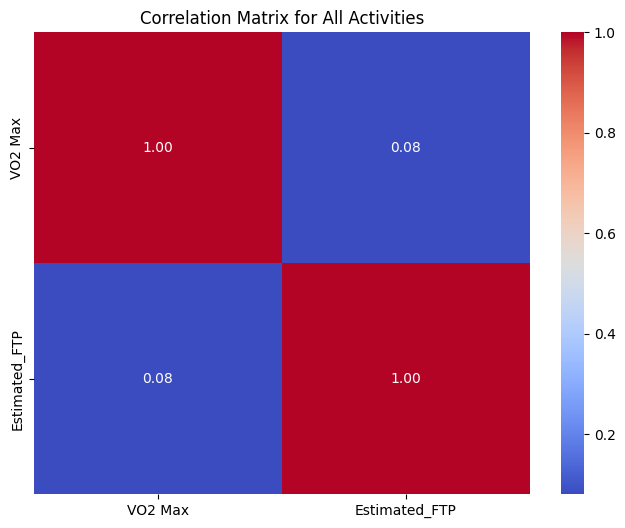

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Relevant columns for correlation
relevant_columns = ['VO2 Max', 'Estimated_FTP']

# Ensure the data contains the required columns
if not set(relevant_columns).issubset(data.columns):
    raise ValueError(f"Missing one or more columns: {relevant_columns}")

# Select relevant columns
all_activities_data = data[relevant_columns]

# Drop rows with missing values to avoid NaN in correlation
all_activities_data = all_activities_data.dropna()

# Compute correlation matrix
correlation_matrix = all_activities_data.corr()

# Print correlation matrix
print("Correlation Matrix for All Activities:\n")
print(correlation_matrix)

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title("Correlation Matrix for All Activities")
plt.show()

The correlation coefficient is 0.0808, indicating a very weak positive correlation between VO2 Max and Estimated FTP.

### **Box-plot**

<ipython-input-54-6686589240dd>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Activity Type', y='VO2 Max', palette="Set2")


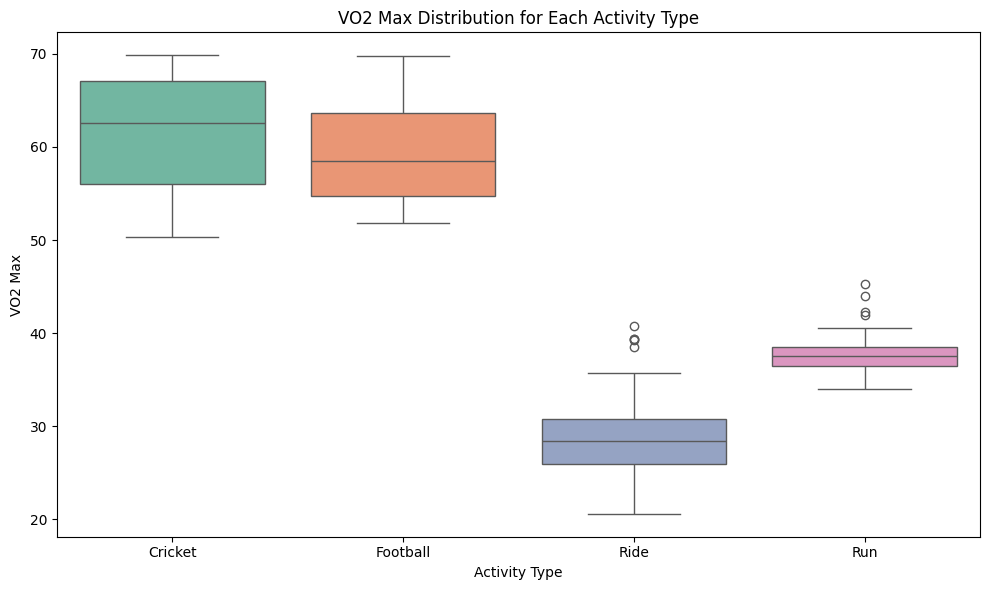

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare VO2 Max distributions across activity types
plt.figure(figsize=(10, 6))

# Create a box plot grouped by Activity Type
sns.boxplot(data=df, x='Activity Type', y='VO2 Max', palette="Set2")

# Adding labels and title
plt.xlabel('Activity Type')
plt.ylabel('VO2 Max')
plt.title('VO2 Max Distribution for Each Activity Type')

# Show the plot
plt.tight_layout()
plt.show()

**Cricket and Football:** Both activities have similar median VO2 Max values around 21-22 and relatively narrow IQRs, indicating less variability.

**Ride and Run:** These activities have higher median VO2 Max values (around 30 for Ride and 37 for Run) and wider IQRs, indicating greater variability in VO2 Max. Ride and Run also have several high outliers, suggesting that some athletes achieve exceptionally high VO2 Max values in these activities.

**Identify Outliers**

          VO2 Max  Estimated_FTP
count  445.000000     445.000000
mean    38.990823     186.281577
std     12.728686      41.110378
min     20.576875     103.770000
25%     29.530625     153.180000
50%     36.638174     187.406755
75%     40.017698     222.480000
max     69.859853     284.130000
Outliers in VO2 Max:
    Activity ID          Activity Date        Activity Name Activity Type  \
0    2929442069  23 Mar 2023, 03:23:30    Cricket Session 1       Cricket   
1    2929442070  03 Aug 2022, 03:23:30    Cricket Session 2       Cricket   
3    2929442072  19 Oct 2023, 03:23:30    Cricket Session 4       Cricket   
4    2929442073  02 Nov 2023, 03:23:30    Cricket Session 5       Cricket   
6    2929442075  13 Apr 2024, 03:23:30    Cricket Session 7       Cricket   
..          ...                    ...                  ...           ...   
92   2929442111  16 Apr 2024, 03:23:30  Football Session 43      Football   
93   2929442112  16 May 2024, 03:23:30  Football Session 44      F

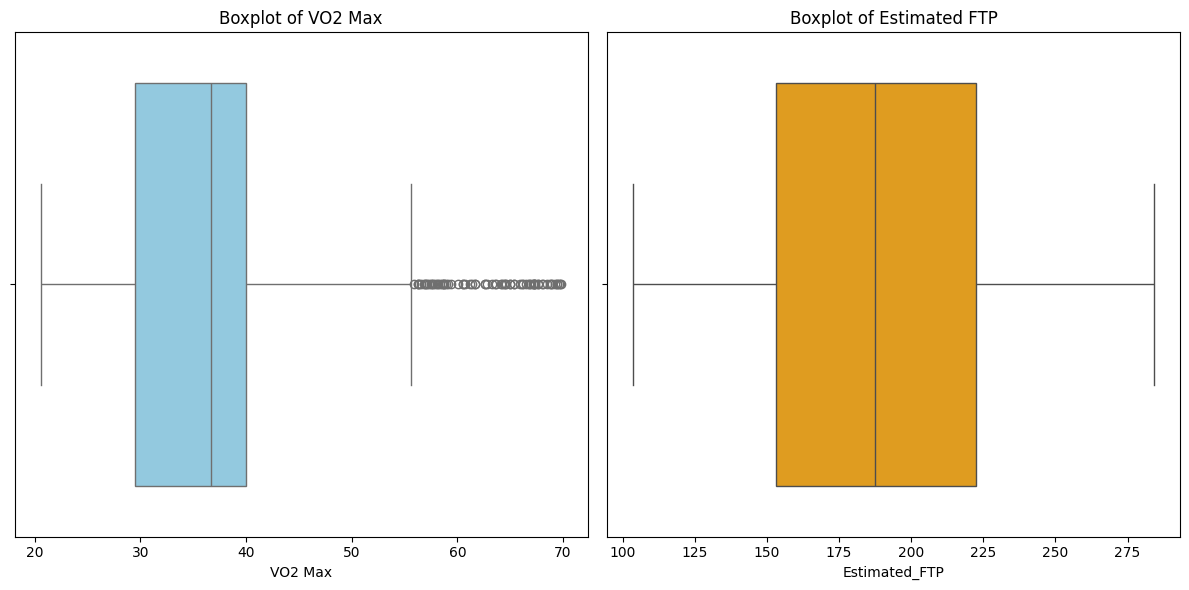

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load data
data = pd.read_csv("/content/simu_vo2_activities_with_ftp.csv")

# Statistical Summary
print(data[['VO2 Max', 'Estimated_FTP']].describe())

# Define IQR-based outlier detection
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for VO2 Max and Estimated_FTP
outliers_vo2 = detect_outliers(data, 'VO2 Max')
outliers_ftp = detect_outliers(data, 'Estimated_FTP')

print("Outliers in VO2 Max:")
print(outliers_vo2)

print("\nOutliers in Estimated_FTP:")
print(outliers_ftp)

# Visualize using boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data['VO2 Max'], color='skyblue')
plt.title("Boxplot of VO2 Max")

plt.subplot(1, 2, 2)
sns.boxplot(x=data['Estimated_FTP'], color='orange')
plt.title("Boxplot of Estimated FTP")

plt.tight_layout()
plt.show()



VO2 Max: Ranges from 20.58 to 69.86, with outliers on the higher side. Median is ~36.64.

Estimated FTP: Ranges from 103.77 to 284.13, with no visible outliers. Median is ~187.41.

Outliers: High VO2 Max values appear as outliers and may need investigation.

Activity Types: Includes cricket, football, etc., with possible variation in performance metrics across types.

VO2 Max Outliers: Detected using the IQR method, a set of outliers has been identified, primarily from activities such as cricket and football. These values likely represent exceptional performances or potential data errors.

Estimated FTP Outliers: Similarly, outliers for Estimated FTP have been detected, potentially indicating extreme performance values or errors.

**Handling Outliers:**

In [7]:
# Retain the outliers as a separate group for further analysis
elite_athletes = outliers_vo2  # Outliers detected earlier
non_elite_athletes = data[~data['VO2 Max'].isin(elite_athletes['VO2 Max'])]  # Data excluding the outliers

# Separate analysis for elite athletes
print("Athletes Analysis (VO2 Max Outliers):")
print(elite_athletes[['Activity Name', 'VO2 Max', 'Estimated_FTP']])

# Example analysis: Calculate mean VO2 Max for elite athletes
mean_vo2_elite = elite_athletes['VO2 Max'].mean()
print("\nMean VO2 Max for Athletes:", mean_vo2_elite)

# Analysis for non-elite athletes (without outliers)
print("\nAnalysis for Athletes (without outliers):")
print(non_elite_athletes[['Activity Name', 'VO2 Max', 'Estimated_FTP']])

# Example analysis: Calculate mean VO2 Max for non-elite athletes
mean_vo2_non_elite = non_elite_athletes['VO2 Max'].mean()
print("\nMean VO2 Max for  Athletes:", mean_vo2_non_elite)

Athletes Analysis (VO2 Max Outliers):
          Activity Name    VO2 Max  Estimated_FTP
0     Cricket Session 1  67.999502     212.361463
1     Cricket Session 2  67.381322     205.151665
3     Cricket Session 4  66.745731     195.509708
4     Cricket Session 5  60.738805     172.209424
6     Cricket Session 7  62.580703     188.297043
..                  ...        ...            ...
92  Football Session 43  57.465203     209.395031
93  Football Session 44  66.169002     134.171329
96  Football Session 47  66.933226     172.674793
98  Football Session 49  66.775851     160.179087
99  Football Session 50  58.354598     115.349073

[73 rows x 3 columns]

Mean VO2 Max for Athletes: 62.9894768209871

Analysis for Athletes (without outliers):
                                         Activity Name    VO2 Max  \
2                                    Cricket Session 3  50.461997   
5                                    Cricket Session 6  55.378853   
13                                  Cricket 

Outliers Identified: 73 activity sessions (both cricket and football) had VO2 Max values above the general range, indicating potential athletes.

Mean VO2 Max for Athletes: 62.99
This is significantly higher than the average for the overall dataset, suggesting these values represent exceptional performances.
You can choose to conduct separate analyses for this group, focusing on their training and performance metrics (e.g., FTP).

Athletes Analysis (without outliers):
Data Remaining After Removing Outliers: 372 activity sessions remain after excluding the elite athletes' VO2 Max outliers.
Mean VO2 Max for  Athletes: 34.28
This is more in line with the general range for athletes.

**Remove Outliers**

In [8]:
# Define IQR-based outlier detection
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for VO2 Max and Estimated_FTP
outliers_vo2 = detect_outliers(data, 'VO2 Max')
outliers_ftp = detect_outliers(data, 'Estimated_FTP')

# Remove outliers by filtering out rows with VO2 Max outliers
data_no_outliers = data[~data['VO2 Max'].isin(outliers_vo2['VO2 Max'])]
data_no_outliers = data_no_outliers[~data_no_outliers['Estimated_FTP'].isin(outliers_ftp['Estimated_FTP'])]

# Verify the dataset after removing outliers
print("Data after removing outliers:")
print(data_no_outliers[['VO2 Max', 'Estimated_FTP']].describe())

# Optionally, save the cleaned data to a new CSV
data_no_outliers.to_csv("/content/simu_vo2_activities_no_outliers.csv", index=False)

Data after removing outliers:
          VO2 Max  Estimated_FTP
count  372.000000     372.000000
mean    34.281409     190.143932
std      7.380344      41.442326
min     20.576875     103.770000
25%     28.604375     155.025000
50%     35.165312     191.703938
75%     37.918876     225.202500
max     55.581155     284.130000


VO2 Max values now range from 20.58 to 55.58, with no extreme outliers remaining.

Estimated FTP values show a range from 103.77 to 284.13, with a more normalized distribution after removing the outliers.

**Visualizing the Data and Exploring Correlations between VO2 Max and Estimated FTP:**

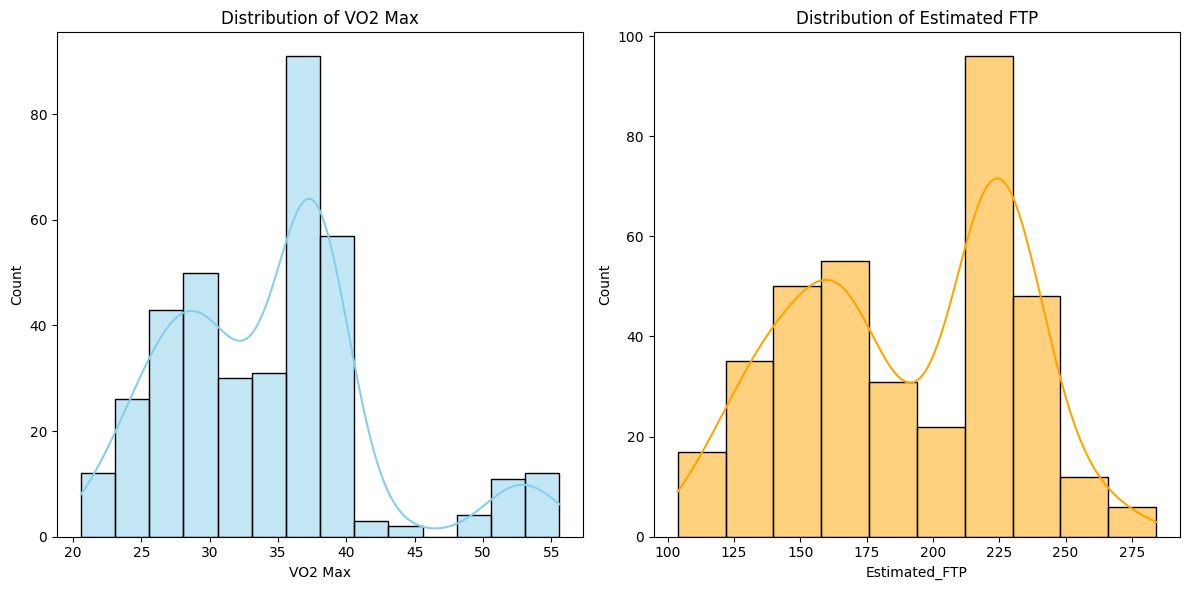

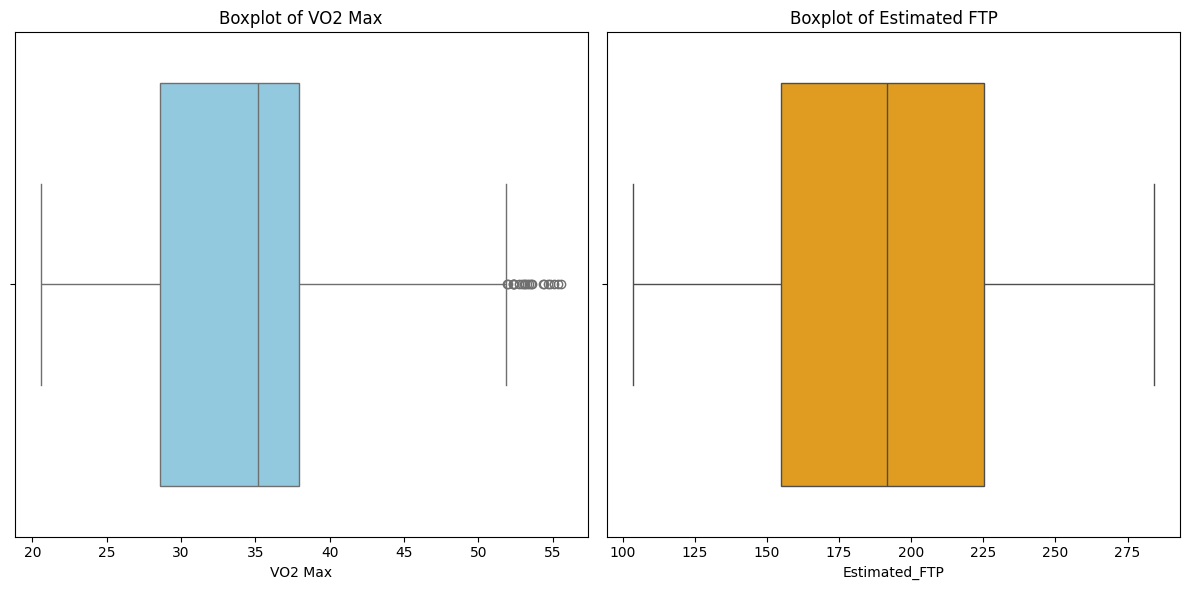

                VO2 Max  Estimated_FTP
VO2 Max        1.000000       0.529434
Estimated_FTP  0.529434       1.000000


In [11]:
# Load the cleaned data without outliers
data_no_outliers = pd.read_csv("/content/simu_vo2_activities_no_outliers.csv")

# Visualize the distribution of VO2 Max and Estimated FTP
plt.figure(figsize=(12, 6))

# Distribution plot for VO2 Max
plt.subplot(1, 2, 1)
sns.histplot(data_no_outliers['VO2 Max'], kde=True, color='skyblue')
plt.title('Distribution of VO2 Max')

# Distribution plot for Estimated FTP
plt.subplot(1, 2, 2)
sns.histplot(data_no_outliers['Estimated_FTP'], kde=True, color='orange')
plt.title('Distribution of Estimated FTP')

plt.tight_layout()
plt.show()

# Boxplot for VO2 Max and Estimated FTP
plt.figure(figsize=(12, 6))

# Boxplot for VO2 Max
plt.subplot(1, 2, 1)
sns.boxplot(x=data_no_outliers['VO2 Max'], color='skyblue')
plt.title('Boxplot of VO2 Max')

# Boxplot for Estimated FTP
plt.subplot(1, 2, 2)
sns.boxplot(x=data_no_outliers['Estimated_FTP'], color='orange')
plt.title('Boxplot of Estimated FTP')

plt.tight_layout()
plt.show()

# Correlation analysis
correlation_matrix = data_no_outliers[['VO2 Max', 'Estimated_FTP']].corr()
print(correlation_matrix)


**VO2 Max Distribution:**

The VO2 Max values are concentrated between 30-40, with fewer extreme values, indicating a more consistent dataset.

The distribution is right-skewed, with a larger number of athletes having lower VO2 Max values.

**Estimated FTP Distribution:**

The FTP values are centered around 150-250, showing a more uniform distribution.

The data is approximately normally distributed, with no extreme outliers.

**Boxplot Insights:**

For VO2 Max, most values fall within the interquartile range (30-40), and there are no extreme outliers.

For Estimated FTP, the data is more consistent with a narrower range and no outliers present.

The updated correlation between VO2 Max and Estimated FTP is 0.529. This indicates a moderate positive correlation between the two variables. Here’s what this means:

Positive Correlation: As VO2 Max increases, Estimated FTP tends to increase as well, suggesting that individuals with higher VO2 Max values tend to have higher FTP values (functional threshold power).
Moderate Strength: A correlation of 0.529 is moderate, which means the relationship is noticeable, but not perfect. There may still be other factors influencing FTP aside from VO2 Max.

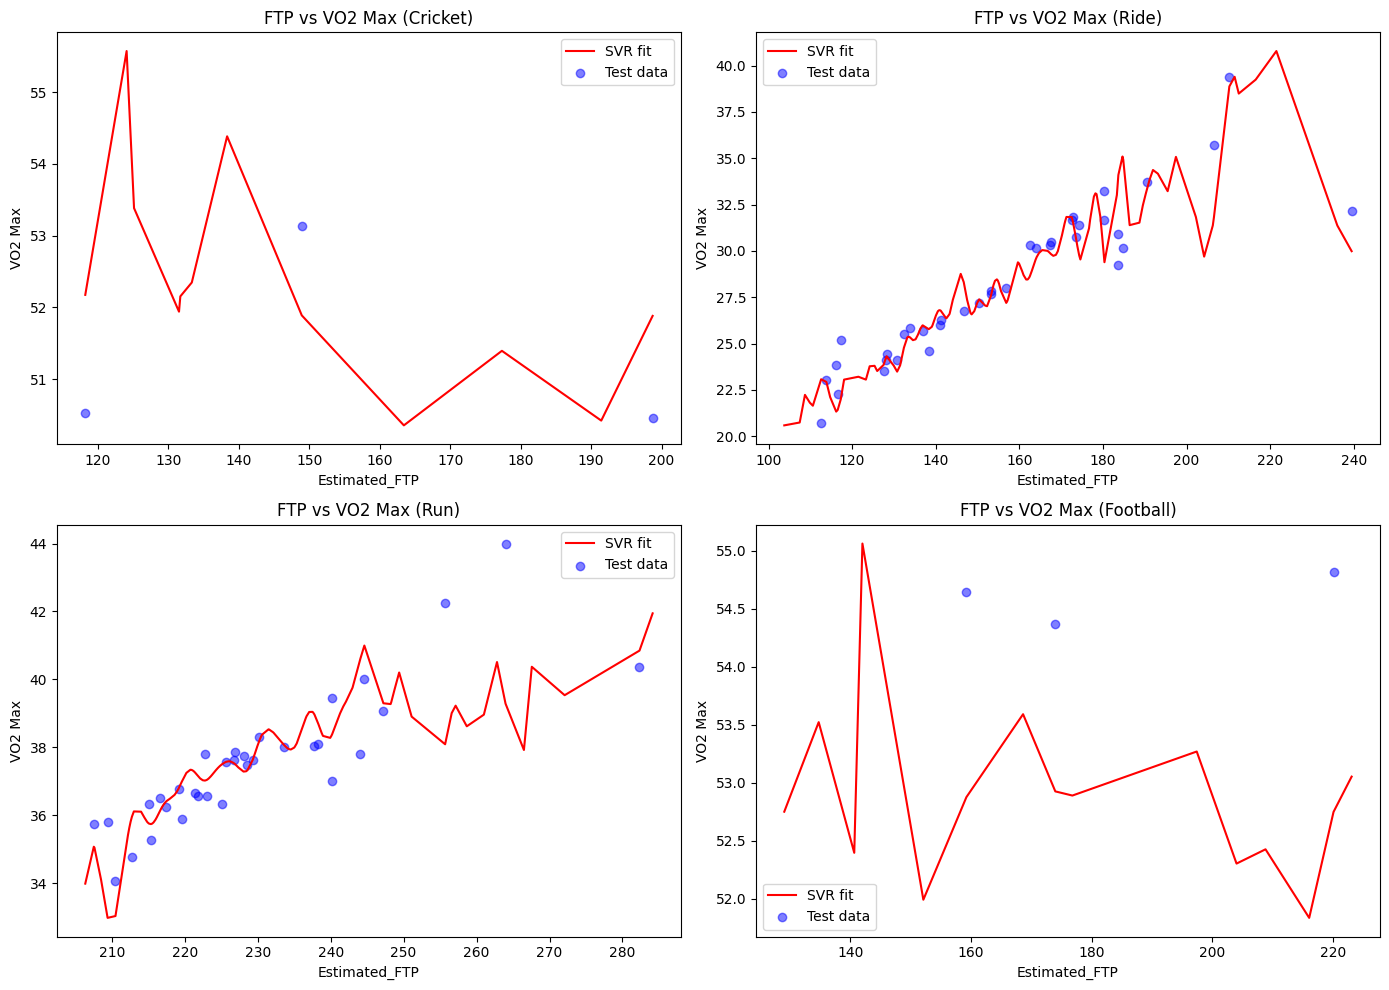

Performance Metrics for each activity:
Cricket: R² = -0.349, RMSE = 1.445
Ride: R² = 0.778, RMSE = 1.893
Run: R² = 0.464, RMSE = 1.445
Football: R² = -92.464, RMSE = 1.781


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load the cleaned dataset
df = pd.read_csv('/content/simu_vo2_activities_no_outliers.csv')

# Define activity types
activity_types = ['Cricket', 'Ride', 'Run', 'Football']

# Set up subplots for each activity
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

# Create a dictionary to store performance metrics
performance_metrics = {}

# Loop through each activity type and apply SVR
for i, activity in enumerate(activity_types):
    # Filter data by activity type
    activity_data = df[df['Activity Type'] == activity]

    # Check if there is any data for the activity
    if activity_data.empty:
        axs[i].text(0.5, 0.5, f"No data for {activity}", ha='center', va='center', fontsize=12, color='red')
        axs[i].set_title(f'FTP vs VO2 Max ({activity.capitalize()})')
        axs[i].set_xlabel('Estimated_FTP')
        axs[i].set_ylabel('VO2 Max')
        continue  # Skip to the next activity type if there's no data

    # Extract FTP and VO2 Max
    X = activity_data[['Estimated_FTP']].values
    y = activity_data['VO2 Max'].values

    # Split data into training and testing sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize SVR model with RBF kernel
    svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)

    # Train the SVR model
    svr.fit(X_train, y_train)

    # Predict VO2 Max values for test set
    y_pred = svr.predict(X_test)

    # Calculate performance metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store performance metrics in the dictionary
    performance_metrics[activity] = {'R²': r2, 'RMSE': rmse}

    # Plot the SVR regression line
    X_sorted = np.sort(X.flatten())  # Sort FTP values for smoother plot
    y_sorted_pred = svr.predict(X_sorted.reshape(-1, 1))

    axs[i].plot(X_sorted, y_sorted_pred, color='red', label='SVR fit')
    axs[i].scatter(X_test, y_test, color='blue', label='Test data', alpha=0.5)
    axs[i].set_title(f'FTP vs VO2 Max ({activity.capitalize()})')
    axs[i].set_xlabel('Estimated_FTP')
    axs[i].set_ylabel('VO2 Max')
    axs[i].legend()

# Adjust the layout for subplots
plt.tight_layout()
plt.show()

# Print performance metrics after plots
print("Performance Metrics for each activity:")
for activity, metrics in performance_metrics.items():
    print(f"{activity}: R² = {metrics['R²']:.3f}, RMSE = {metrics['RMSE']:.3f}")

Despite removing outliers from the dataset, the predictions for the Cricket and Football activities still show weak performance, as indicated by the following results:

Cricket:

R²: -0.349 (indicating a poor fit)
RMSE: 1.445

Football:

R²: -92.464 (indicating a very poor fit)
RMSE: 1.781

These results suggest that the SVR model is struggling to make accurate predictions for these two activities, despite outlier removal. The model's performance for Ride and Run is considerably better, with R² values of 0.778 and 0.464, respectively, but Cricket and Football remain problematic.

This could indicate a deeper issue with the dataset itself, possibly due to:

Data quality issues: There might be missing, inconsistent, or erroneous data specific to Cricket and Football sessions that the model cannot effectively learn from.

Feature selection: It's possible that the features being used (Estimated FTP and VO2 Max) aren't capturing all the relevant information for these activities.

Next Steps:

Data investigation: I plan to further inspect the dataset for anomalies, missing values, or features that might be influencing the poor model performance.

Feature engineering: Introducing new features or transforming existing ones could help improve the model's ability to predict more accurately, especially for Cricket and Football. For example, additional variables like "Maximum Power," "Heart Rate," or "Distance" might provide more insight into the VO2 Max prediction.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('/content/simu_vo2_activities_with_ftp.csv')

# Filter the data for 'Ride' and 'Run' activities
ride_run_df = df[df['Activity Type'].isin(['Ride', 'Run'])]

# Extract features (Estimated_FTP) and target (VO2 Max)
X = ride_run_df[['Estimated_FTP']].values
y = ride_run_df['VO2 Max'].values

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize dictionaries to store performance metrics for each model
performance_metrics = {'Linear': {}, 'Polynomial': {}, 'SVR': {}}

# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)
r2_linear = r2_score(y_test, y_pred_linear)

performance_metrics['Linear'] = {'R²': r2_linear}

# Polynomial Regression
poly = PolynomialFeatures(degree=2)  # You can adjust the degree based on experimentation
X_poly = poly.fit_transform(X_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)
X_poly_test = poly.transform(X_test)
y_pred_poly = poly_regressor.predict(X_poly_test)
r2_poly = r2_score(y_test, y_pred_poly)

performance_metrics['Polynomial'] = {'R²': r2_poly}

# Support Vector Regression (SVR)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
r2_svr = r2_score(y_test, y_pred_svr)

performance_metrics['SVR'] = {'R²': r2_svr}

# Display performance metrics for each model and determine the best model
best_model = max(performance_metrics, key=lambda x: performance_metrics[x]['R²'])
print("Performance Metrics for each model:")
for model, metrics in performance_metrics.items():
    print(f"{model}: R² = {metrics['R²']:.3f}")

print(f"\nThe best model for Ride and Run activities is: {best_model}")

Performance Metrics for each model:
Linear: R² = 0.946
Polynomial: R² = 0.953
SVR: R² = 0.901

The best model for Ride and Run activities is: Polynomial


**Summary of Model Comparison for Ride and Run Activities**

After evaluating three different regression models — Linear Regression, Polynomial Regression, and Support Vector Regression (SVR) — to predict VO2 Max from Estimated FTP for the Ride and Run activities, the following conclusions were drawn:

Performance Metrics:

Linear Regression: R² = 0.946
Polynomial Regression: R² = 0.953
SVR: R² = 0.901
Analysis:

The Polynomial Regression model achieved the highest R² score (0.953), indicating that it explains the most variance in the data. This suggests that the relationship between Estimated FTP and VO2 Max for both Ride and Run activities is non-linear, which the Polynomial model captures more effectively.

The Linear Regression model performed well with an R² of 0.946, but its performance was slightly lower than the Polynomial model, indicating that a simple linear relationship might not fully capture the complexities of the data.

The SVR model, while capable of handling non-linear relationships, had the lowest R² of 0.901, suggesting that it did not capture the data trends as well as the Polynomial model.

**Conclusion:**

Based on the R² values, the Polynomial Regression model is the best fit for predicting VO2 Max from Estimated FTP for the Ride and Run activities. The higher R² indicates that the model explains a greater portion of the variance in the dependent variable.
This analysis suggests that Polynomial Regression is the most appropriate model to predict VO2 Max in these two activities, as it accounts for the non-linear nature of the relationship between FTP and VO2 Max more effectively than the other models.

